In [1]:
import os
import csv


In [2]:
file_path = os.getcwd()
dataset_path = os.path.join(file_path, "Dataset_demo")
dataset_path_lab = os.path.join(dataset_path, "in-lab")
dataset_path_wild = os.path.join(dataset_path, "in-wild")

In [3]:
def get_dataset(lab_wild, environments, train_test):
    if lab_wild == "lab":
        data = []
        labels = []
        tabel = {}


        test_folder_list = os.listdir(dataset_path_lab)

        for test_folder_name in test_folder_list:
            print(test_folder_name)
            temp_path = os.path.join(dataset_path_lab, test_folder_name)

            for env in environments:
                print(env)
                path_dir = os.path.join(temp_path, env+"_"+train_test)

                file_list = os.listdir(path_dir)
                i=0
                for file_name in file_list:
                    if i%1000 == 0:
                        print(i, "/", len(file_list))
                    csv_name = path_dir + '/' + file_name
                    f = open(csv_name, 'r', encoding='utf-8')
                    rdr = csv.reader(f)

                    temp = file_name.split("_")
                    temp_name = temp[0].split("-")
                    for line in rdr:
                        try:
                            data.append([float(l) for l in line[:-1]])
                        except:
                            print(line)
                            a=input()
                            
                        labels.append(int(temp_name[0]))
                        if not "-".join(temp_name[1:]) in tabel:
                            tabel["-".join(temp_name[1:])] = int(temp_name[0])
                    i+=1
        return data, labels, tabel

In [4]:
dataset, labels, tabel=get_dataset(lab_wild="lab", environments=['quiet'], train_test="train")


P1
quiet
0 / 2300


KeyboardInterrupt: 

In [5]:
len(dataset)

46000

In [6]:
import pandas as pd

d = pd.DataFrame(dataset)
d.describe()

,0,1,2,3,4,5,6,7,8,9,...,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287
count,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,...,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000
mean,14.813891,12.671348,10.092304,8.038783,7.226739,7.568283,7.424717,5.819435,3.488913,2.562304,...,0.283938,0.281251,0.276036,0.266169,0.255983,0.242976,0.225611,0.203006,0.176543,0.144692
std,1186.520100,1200.942012,1205.180852,1229.038872,1237.355523,1253.156479,1269.246010,1270.586293,1302.486540,1331.730238,...,0.794391,0.816407,0.837991,0.855057,0.876630,0.902182,0.924515,0.947546,0.966976,0.986210
min,-32711.000000,-32507.000000,-32714.000000,-30839.000000,-31630.000000,-32684.000000,-32716.000000,-29926.000000,-32717.000000,-31160.000000,...,-10.888886,-11.237701,-8.811920,-10.077042,-8.650650,-9.147690,-9.028564,-9.901718,-6.638901,-6.772675
25%,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,...,-0.099319,-0.100769,-0.104488,-0.109951,-0.115177,-0.124649,-0.135353,-0.151196,-0.171043,-0.199036
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.208687,0.221565,0.229897,0.236984,0.243805,0.244797,0.245911,0.241592,0.237251,0.229874
75%,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,0.601906,0.617817,0.634739,0.639420,0.647697,0.651188,0.648880,0.640884,0.628025,0.614311
max,32681.000000,29872.000000,27753.000000,27967.000000,29344.000000,30031.000000,32694.000000,32163.000000,31244.000000,32631.000000,...,17.630646,17.382630,17.476700,13.649765,13.445129,12.216660,7.789078,7.494446,7.847534,7.112656


In [7]:
from scipy.fftpack import fft  
import numpy as np  

x = np.array([[4.0, 2.0, 1.0, -3.0, 1.5], [4.0, 2.0, 1.0, -3.0, 1.5]])  
y = fft(x)  
print(len(y[0]))

5


In [8]:
import sys

sys.version

'3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]'

In [11]:

import librosa
import librosa.display
import matplotlib.pyplot as plt

In [12]:

test = d[[i for i in range(4096)]].iloc[1]
test = test.to_numpy()

In [ ]:
for i in range(10):
    plt.subplot(10, 1, i+1)                # nrows=2, ncols=1, index=1
    test = d[[j for j in range(4096)]].iloc[i+1]
    test = test.to_numpy()
    f = np.linspace(0, 4096, 4096)
    
    plt.plot(f, test, 'o-')
    plt.title('Graph'+i)
plt.show()


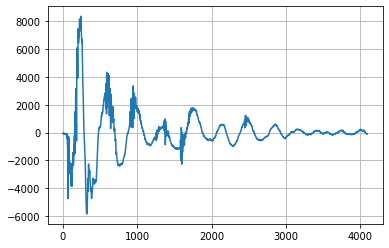

In [13]:

f = np.linspace(0, 4096, 4096)

plt.plot(f, test)

plt.grid()
 
plt.show()

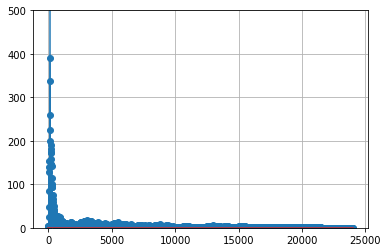

In [77]:
fs = 48000

y = fft(test)/len(test)
length = 2049
f = np.linspace(0, fs/2, length)

plt.stem(f, abs(y[:2049]))

plt.ylim(0, 500)
plt.grid()
 
plt.show()

[[-1.47319806 -1.47319806 -1.47319806 ... -0.67874416 -0.67874416
  -0.67874416]
 [-0.30846428 -0.30846428 -0.30846428 ... -0.04076299 -0.04076299
  -0.04076299]
 [ 0.01724493  0.01724493  0.01724493 ...  0.25298538  0.25298538
   0.25298538]
 ...
 [ 0.06441664  0.06441664  0.06441664 ...  0.21625616  0.21625616
   0.21625616]
 [ 0.06153854  0.06153854  0.06153854 ...  0.04448577  0.04448577
   0.04448577]
 [-0.01342314 -0.01342314 -0.01342314 ...  0.080959    0.080959
   0.080959  ]]
(16, 65)


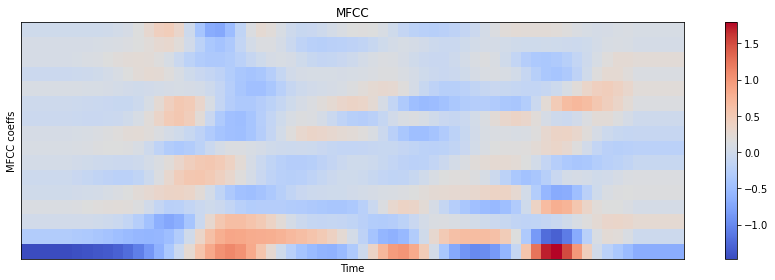

In [75]:
sample_rate=48000

S = librosa.feature.melspectrogram(test, sr=sample_rate, n_fft=2048, n_mels=128, hop_length=64, win_length=None)

log_S = librosa.power_to_db(S, ref=np.max)

mfcc = librosa.feature.mfcc(S=log_S, sr=sample_rate, n_mfcc=16, n_fft=64, hop_length=64, win_length=None)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc)
"""

S = librosa.feature.melspectrogram(test, sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)

"""


print(delta2_mfcc.shape)

#13*8

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [20]:
##

In [21]:
test_dataset, test_labels, test_tabel=get_dataset(lab_wild="lab", environments=['quiet'], train_test="test")


P1
quiet
0 / 230
P10
quiet
0 / 230
P11
quiet
0 / 230
P12
quiet
0 / 230
P13
quiet
0 / 230
P14
quiet
0 / 230
P15
quiet
0 / 230
P16
quiet
0 / 230
P17
quiet
0 / 230
P18
quiet
0 / 230
P19
quiet
0 / 230
P2
quiet
0 / 230
P20
quiet
0 / 230
P3
quiet
0 / 230
P4
quiet
0 / 230
P5
quiet
0 / 230
P6
quiet
0 / 230
P7
quiet
0 / 230
P8
quiet
0 / 230
P9
quiet
0 / 230


In [22]:
d_t = pd.DataFrame(dataset)
d_t.describe()

,0,1,2,3,4,5,6,7,8,9,...,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287
count,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,...,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000,46000.000000
mean,14.813891,12.671348,10.092304,8.038783,7.226739,7.568283,7.424717,5.819435,3.488913,2.562304,...,0.283938,0.281251,0.276036,0.266169,0.255983,0.242976,0.225611,0.203006,0.176543,0.144692
std,1186.520100,1200.942012,1205.180852,1229.038872,1237.355523,1253.156479,1269.246010,1270.586293,1302.486540,1331.730238,...,0.794391,0.816407,0.837991,0.855057,0.876630,0.902182,0.924515,0.947546,0.966976,0.986210
min,-32711.000000,-32507.000000,-32714.000000,-30839.000000,-31630.000000,-32684.000000,-32716.000000,-29926.000000,-32717.000000,-31160.000000,...,-10.888886,-11.237701,-8.811920,-10.077042,-8.650650,-9.147690,-9.028564,-9.901718,-6.638901,-6.772675
25%,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,-46.000000,...,-0.099319,-0.100769,-0.104488,-0.109951,-0.115177,-0.124649,-0.135353,-0.151196,-0.171043,-0.199036
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.208687,0.221565,0.229897,0.236984,0.243805,0.244797,0.245911,0.241592,0.237251,0.229874
75%,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,0.601906,0.617817,0.634739,0.639420,0.647697,0.651188,0.648880,0.640884,0.628025,0.614311
max,32681.000000,29872.000000,27753.000000,27967.000000,29344.000000,30031.000000,32694.000000,32163.000000,31244.000000,32631.000000,...,17.630646,17.382630,17.476700,13.649765,13.445129,12.216660,7.789078,7.494446,7.847534,7.112656


In [23]:
test_dataset_sound = d_t[[i for i in range(4096)]]
test_dataset_acc_x = d_t[[i for i in range(4096, 4127)]]
test_dataset_acc_y = d_t[[i for i in range(4128, 4159)]]
test_dataset_acc_z = d_t[[i for i in range(4160, 4191)]]
test_dataset_gyr_x = d_t[[i for i in range(4192, 4223)]]
test_dataset_gyr_y = d_t[[i for i in range(4224, 4255)]]
test_dataset_gyr_z = d_t[[i for i in range(4256, 4287)]]

In [24]:
len(test_dataset)

4600

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [93]:
def get_mfccs(data):
    sample_rate=48000

    S = librosa.feature.melspectrogram(data, sr=sample_rate, n_fft=2048, n_mels=128, hop_length=64, win_length=None)

    log_S = librosa.power_to_db(S, ref=np.max)

    mfcc = librosa.feature.mfcc(S=log_S, sr=sample_rate, n_mfcc=16, n_fft=64, hop_length=64, win_length=None)

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    
    return delta2_mfcc

def get_features(d):
    d = np.array(d)
    dataset_sound = d[:4096]
    dataset_acc_x = d[4096:4127]
    dataset_acc_y = d[4128:4159]
    dataset_acc_z = d[4160:4191]
    dataset_gyr_x = d[4192:4223]
    dataset_gyr_y = d[4224:4255]
    dataset_gyr_z = d[4256:4287]
    
    dataset_sound_mag = fft(dataset_sound)
    dataset_sound_mag = abs(dataset_sound_mag[:2049])
    if 0 in dataset_sound_mag:
        dataset_sound_mag = np.where(dataset_sound_mag==0, 0.0000001, dataset_sound_mag)
    dataset_sound_mag_log = np.log(dataset_sound_mag)
    
    dataset_mfccs = get_mfccs(dataset_sound).flatten()
    
    dataset_acc_x = np.pad(dataset_acc_x, ((0, 224)), 'constant')
    dataset_acc_x_mag = abs(fft(dataset_acc_x))
    
    dataset_gyr_z = np.pad(dataset_gyr_z, ((0, 224)), 'constant')
    dataset_gyr_z_mag = abs(fft(dataset_gyr_z))
    """
    print(dataset_sound_mag)
    print(dataset_sound_mag_log.dtype)
    print(dataset_mfccs.dtype)
    print(dataset_acc_x_mag.dtype)
    print(dataset_gyr_z_mag.dtype)
    """
    return np.concatenate ((dataset_sound_mag, dataset_sound_mag_log, dataset_mfccs, dataset_acc_x_mag, dataset_gyr_z_mag))

In [94]:
dataset_pre = np.zeros((46000, 5648))
dataset_test_pre = np.zeros((4600, 5648))
for i, d in enumerate(dataset):
    if i%1000 == 0:
        print(i, '/', len(dataset))
        
    dataset_pre[i]  = get_features(d)
    
for i, d in enumerate(test_dataset):
    if i%1000 == 0:
        print(i, '/', len(test_dataset))
    dataset_test_pre[i] = get_features(d)
    

0 / 46000
1000 / 46000
2000 / 46000
3000 / 46000
4000 / 46000
5000 / 46000
6000 / 46000
7000 / 46000
8000 / 46000
9000 / 46000
10000 / 46000
11000 / 46000
12000 / 46000
13000 / 46000
14000 / 46000
15000 / 46000
16000 / 46000
17000 / 46000
18000 / 46000
19000 / 46000
20000 / 46000
21000 / 46000
22000 / 46000
23000 / 46000
24000 / 46000
25000 / 46000
26000 / 46000
27000 / 46000
28000 / 46000
29000 / 46000
30000 / 46000
31000 / 46000
32000 / 46000
33000 / 46000
34000 / 46000
35000 / 46000
36000 / 46000
37000 / 46000
38000 / 46000
39000 / 46000
40000 / 46000
41000 / 46000
42000 / 46000
43000 / 46000
44000 / 46000
45000 / 46000
0 / 4600
1000 / 4600
2000 / 4600
3000 / 4600
4000 / 4600


In [95]:
np.NaN in dataset_pre

False

In [96]:
import pickle

from sklearn import svm

try:
    # load
    with open('model_preproccessed.pkl', 'rb') as f:
        clf = pickle.load(f)
except:

    clf = svm.SVC(kernel='linear')
    clf.fit(dataset_pre, labels)
    

In [97]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(dataset_test_pre)

accuracy_score(test_labels, y_pred)

0.9360869565217391

In [101]:
with open('model_preproccessed.pkl','wb') as f:
    pickle.dump(clf,f)